In [1]:
!pip install kneed

In [ ]:
!pip install hyperopt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/CancerSubtypesAI

/content/drive/MyDrive/CancerSubtypesAI


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 로드

In [8]:
train_data = pd.read_csv('./data/processed/saac/train_saac_features_cutoff_30.csv')

In [9]:
test_data = pd.read_csv('./data/processed/saac/test_saac_features_cutoff_30.csv')

In [61]:
train_data.describe()

,A2M_c_term_A,ABCA3_c_term_A,ABCA4_c_term_A,ABCA8_c_term_A,ABCB1_c_term_A,ABCB11_c_term_A,ABCC3_c_term_A,ABCC8_c_term_A,ABL1_c_term_A,ACACA_c_term_A,...,TSC2_seq_len,TUBA3C_seq_len,UQCRFS1_seq_len,VCAN_seq_len,VHL_seq_len,VWF_seq_len,WIZ_seq_len,XDH_seq_len,ZFPM2_seq_len,ZNF292_seq_len
count,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,...,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.0,6201.000000,6201.000000,6201.000000
mean,9.273015,7.812414,7.178039,6.172822,9.376409,9.844909,7.644092,8.523825,13.268462,5.680260,...,1836.940816,449.791969,273.962103,3389.160135,248.029995,2807.788582,1889.0,1332.276891,1150.614578,2722.020481
std,0.129635,0.004793,0.118999,0.000466,0.250317,0.107409,0.094045,0.003893,0.179526,0.038049,...,1.785031,7.698446,2.311126,104.624952,16.443424,98.973696,0.0,22.734511,14.053187,43.545594
min,0.000000,7.489879,3.030303,6.160164,3.773585,5.325444,6.220096,8.316008,5.759162,4.666667,...,1781.000000,102.000000,104.000000,1240.000000,73.000000,259.000000,1889.0,157.000000,125.000000,632.000000
25%,9.276018,7.812500,7.184751,6.172840,9.375000,9.848485,7.641921,8.523909,13.274336,5.681818,...,1837.000000,450.000000,274.000000,3396.000000,250.000000,2813.000000,1889.0,1333.000000,1151.000000,2723.000000
50%,9.276018,7.812500,7.184751,6.172840,9.375000,9.848485,7.641921,8.523909,13.274336,5.681818,...,1837.000000,450.000000,274.000000,3396.000000,250.000000,2813.000000,1889.0,1333.000000,1151.000000,2723.000000
75%,9.276018,7.812500,7.184751,6.172840,9.375000,9.848485,7.641921,8.523909,13.274336,5.681818,...,1837.000000,450.000000,274.000000,3396.000000,250.000000,2813.000000,1889.0,1333.000000,1151.000000,2723.000000
max,9.276018,7.812500,7.184751,6.172840,15.853659,12.025316,12.111801,8.523909,13.274336,5.936920,...,1837.000000,450.000000,274.000000,3396.000000,250.000000,2813.000000,1889.0,1333.000000,1151.000000,2723.000000


# 전처리

## 모든 값이 동일한 열 제거

In [10]:
# 모든 값이 동일한 열 확인
train_del_cols = train_data.loc[:, train_data.nunique() == 1].columns
test_del_cols = test_data.loc[:, test_data.nunique() == 1].columns

print(train_del_cols)
print(test_del_cols)

Index(['CD79B_c_term_A', 'CKB_c_term_A', 'DUSP2_c_term_A',
       'SERPINA10_c_term_A', 'AQP7_c_term_C', 'CKB_c_term_C', 'HMGB3_c_term_C',
       'NMU_c_term_C', 'OGFR_c_term_C', 'SERPINA10_c_term_C',
       ...
       'DUSP2_seq_len', 'HELZ2_seq_len', 'IRS2_seq_len', 'PIK3CA_seq_len',
       'PRDM1_seq_len', 'PTGIR_seq_len', 'PTPRC_seq_len', 'SERPINA10_seq_len',
       'TEX15_seq_len', 'WIZ_seq_len'],
      dtype='object', length=1332)
Index(['BTG2_c_term_A', 'CD79B_c_term_A', 'CKB_c_term_A', 'HRAS_c_term_A',
       'SERPINA10_c_term_A', 'SOCS1_c_term_A', 'BTG2_c_term_C',
       'CD79B_c_term_C', 'CKB_c_term_C', 'HMGB3_c_term_C',
       ...
       'NFKBIE_seq_len', 'PHKA2_seq_len', 'POLQ_seq_len', 'PRDM1_seq_len',
       'PRKAA2_seq_len', 'PTGIR_seq_len', 'PTPRM_seq_len', 'SERPINA10_seq_len',
       'SOCS1_seq_len', 'TEX15_seq_len'],
      dtype='object', length=1559)


In [11]:
# 모든 값이 동일한 열 제거
train_data = train_data.drop(columns=train_del_cols)
test_data = test_data.drop(columns=train_del_cols)

In [12]:
print(len(train_data.columns))
print(len(test_data.columns)) # SUBCLASS 열 없음

19860
19859


## label encoding

In [14]:
train_data.SUBCLASS.unique()

array(['KIPAN', 'SARC', 'SKCM', 'KIRC', 'GBMLGG', 'STES', 'BRCA', 'THCA',
       'LIHC', 'HNSC', 'PAAD', 'OV', 'PRAD', 'UCEC', 'LAML', 'COAD',
       'ACC', 'LGG', 'LUSC', 'LUAD', 'CESC', 'PCPG', 'THYM', 'BLCA',
       'TGCT', 'DLBC'], dtype=object)

In [13]:
# SUBCLASS를 인덱스로 매핑
subclasses = ['KIPAN', 'SARC', 'SKCM', 'KIRC', 'GBMLGG', 'STES', 'BRCA', 'THCA',
       'LIHC', 'HNSC', 'PAAD', 'OV', 'PRAD', 'UCEC', 'LAML', 'COAD',
       'ACC', 'LGG', 'LUSC', 'LUAD', 'CESC', 'PCPG', 'THYM', 'BLCA',
       'TGCT', 'DLBC']
subclass_to_idx = {subclass: idx for idx, subclass in enumerate(sorted(subclasses))}
idx_to_subclass = {idx: subclass for subclass, idx in subclass_to_idx.items()}

In [14]:
# 돌연변이 유형을 인덱스로 매핑
mutation_types = ['WT', 'Silent_Missense', 'Missense', 'Nonsense',
       'Complex_mutation', 'Frameshift', 'Silent_Nonsense', 'Deletion',
       'Insertion', 'Delins', 'Unknown']
mutation_type_to_idx = {mt: idx for idx, mt in enumerate(mutation_types)}

In [15]:
X_train = train_data.drop(columns=['ID', 'SUBCLASS'])
y_train = train_data['SUBCLASS'].map(subclass_to_idx)

X_test = test_data.drop(columns=['ID'])

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(6201, 19858)
(6201,)
(2546, 19858)


In [17]:
# 변이 유형 (type) 열 인코딩
def encode_mutation_type(df, mutation_type_to_idx):
    matched_columns = [col for col in df.columns if '_type' in col]
    for col in matched_columns:
        df[col] = df[col].map(mutation_type_to_idx)
    return df, matched_columns

In [18]:
X_train, encoded_cols_train = encode_mutation_type(X_train, mutation_type_to_idx)
X_test, encoded_cols_test = encode_mutation_type(X_test, mutation_type_to_idx)

In [19]:
print(len(encoded_cols_train), len(encoded_cols_test))

326 326


In [20]:
X_train[encoded_cols_train]

,A2M_type,ABCA3_type,ABCA4_type,ABCA8_type,ABCB1_type,ABCB11_type,ABCC3_type,ABCC8_type,ABL1_type,ACACA_type,...,TSC2_type,TUBA3C_type,UQCRFS1_type,VCAN_type,VHL_type,VWF_type,WIZ_type,XDH_type,ZFPM2_type,ZNF292_type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,...,2,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,2,1,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_test[encoded_cols_test]

,A2M_type,ABCA3_type,ABCA4_type,ABCA8_type,ABCB1_type,ABCB11_type,ABCC3_type,ABCC8_type,ABL1_type,ACACA_type,...,TSC2_type,TUBA3C_type,UQCRFS1_type,VCAN_type,VHL_type,VWF_type,WIZ_type,XDH_type,ZFPM2_type,ZNF292_type
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,5,0,0,...,2,0,0,0,0,2,5,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2543,0,2,2,2,0,0,1,1,2,1,...,2,0,1,1,0,1,2,0,2,5
2544,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(6201, 19858)
(6201,)
(2546, 19858)


## min_max_scaler

In [23]:
from re import X
def min_max_scaler(df, col_name_patterns):
    # 패턴이 일치하는 칼럼 찾기
    matched_columns = []
    for col in df.columns:
        if any(pattern in col for pattern in col_name_patterns):
            matched_columns.append(col)
    print(f"Matched columns: {matched_columns}")
    print(f"Number of matched columns: {len(matched_columns)}")

    # 열별 최소값, 최대값 저장 딕셔너리
    scaler_dict = {}

    # normalization
    df_scaled = df.copy()
    for column in matched_columns:
        col_min = df_scaled[column].min()
        col_max = df_scaled[column].max()
        df_scaled[column] = (df_scaled[column] - col_min) / (col_max - col_min)
        scaler_dict[column] = (col_min, col_max)

    return df_scaled, scaler_dict, matched_columns

In [24]:
# 서열 길이 normalization
X_train, scaler_dict, scaled_cols = min_max_scaler(X_train, ['seq_len'])
for col in scaled_cols:
    X_test[col] = (X_test[col] - scaler_dict[col][0]) / (scaler_dict[col][1] - scaler_dict[col][0])

Matched columns: ['A2M_seq_len', 'ABCA3_seq_len', 'ABCA4_seq_len', 'ABCA8_seq_len', 'ABCB1_seq_len', 'ABCB11_seq_len', 'ABCC3_seq_len', 'ABCC8_seq_len', 'ABL1_seq_len', 'ACACA_seq_len', 'ACE_seq_len', 'ACSM1_seq_len', 'ACTN2_seq_len', 'ADAM2_seq_len', 'ADAMDEC1_seq_len', 'ADAMTS5_seq_len', 'ADCY1_seq_len', 'ADCY2_seq_len', 'ADCY9_seq_len', 'AGRN_seq_len', 'AHNAK_seq_len', 'AKAP13_seq_len', 'ALB_seq_len', 'ALMS1_seq_len', 'AMOT_seq_len', 'ANK1_seq_len', 'ANPEP_seq_len', 'AOX1_seq_len', 'APC_seq_len', 'AQP7_seq_len', 'AR_seq_len', 'ARHGAP29_seq_len', 'ARHGEF2_seq_len', 'ARID5B_seq_len', 'ARPP21_seq_len', 'ATP1A3_seq_len', 'ATRX_seq_len', 'B2M_seq_len', 'BCL11B_seq_len', 'BMP2K_seq_len', 'BRAF_seq_len', 'BRCA2_seq_len', 'BTG1_seq_len', 'BTG2_seq_len', 'C3_seq_len', 'C8A_seq_len', 'C8B_seq_len', 'CACNA1A_seq_len', 'CACNA1B_seq_len', 'CACNA1H_seq_len', 'CDC27_seq_len', 'CDCP1_seq_len', 'CDH1_seq_len', 'CDH13_seq_len', 'CDH4_seq_len', 'CDH6_seq_len', 'CDH8_seq_len', 'CDKN1A_seq_len', 'CDKN2A

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(6201, 19858)
(6201,)
(2546, 19858)


# 결측치 처리

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Columns: 19858 entries, A2M_c_term_A to ZNF292_type
dtypes: float64(19532), int64(326)
memory usage: 939.5 MB


In [27]:
X_train[X_train.isna()]

,A2M_c_term_A,ABCA3_c_term_A,ABCA4_c_term_A,ABCA8_c_term_A,ABCB1_c_term_A,ABCB11_c_term_A,ABCC3_c_term_A,ABCC8_c_term_A,ABL1_c_term_A,ACACA_c_term_A,...,TSC2_type,TUBA3C_type,UQCRFS1_type,VCAN_type,VHL_type,VWF_type,WIZ_type,XDH_type,ZFPM2_type,ZNF292_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
X_test[X_test.isna()]

,A2M_c_term_A,ABCA3_c_term_A,ABCA4_c_term_A,ABCA8_c_term_A,ABCB1_c_term_A,ABCB11_c_term_A,ABCC3_c_term_A,ABCC8_c_term_A,ABL1_c_term_A,ACACA_c_term_A,...,TSC2_type,TUBA3C_type,UQCRFS1_type,VCAN_type,VHL_type,VWF_type,WIZ_type,XDH_type,ZFPM2_type,ZNF292_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# 차원 축소 (PCA)

## 차원 개수 결정

In [31]:
# 초기 PCA 수행 (차원 수 지정하지 않음)
pca_initial = PCA()
pca_initial.fit(X_train)

PCA()

In [32]:
# 1. 설명된 분산 비율
explained_variance_ratio = pca_initial.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

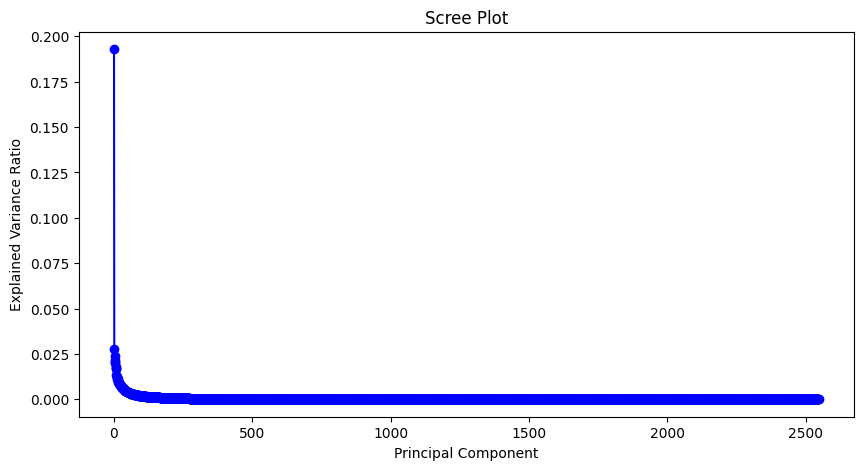

In [33]:
# 2. 스크리 플롯
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

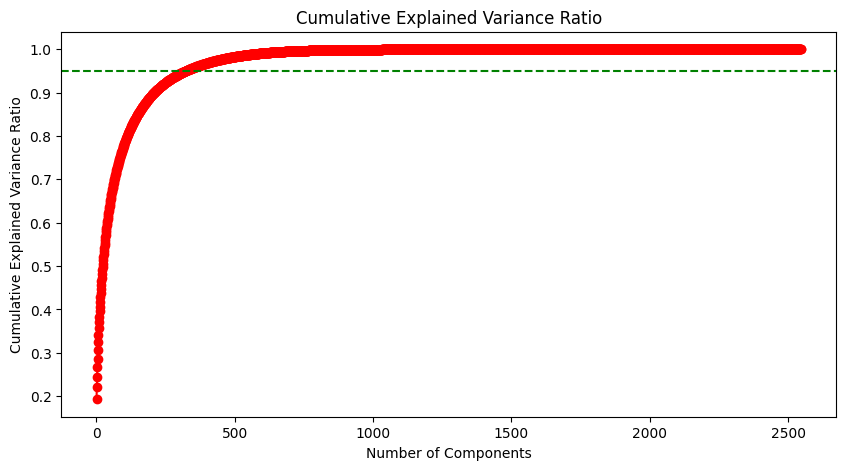

In [34]:
# 3. 누적 설명된 분산 비율
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

In [35]:
# 4. 카이저 규칙 (고유값 > 1)
n_components_kaiser = sum(pca_initial.explained_variance_ > 1)
print(f"Kaiser's rule suggests {n_components_kaiser} components")

Kaiser's rule suggests 90 components


In [36]:
# 5. 설명된 분산 비율 임계값 (예: 95%)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"95% explained variance suggests {n_components_95} components")

95% explained variance suggests 323 components


In [39]:
# 6. 엘보우 방법
from kneed import KneeLocator
kneedle = KneeLocator(range(1, len(explained_variance_ratio) + 1),
                      explained_variance_ratio,
                      curve='convex',
                      direction='decreasing')
print(f"Elbow method suggests {kneedle.knee} components")

Elbow method suggests 62 components


## pca 실행

In [30]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(6201, 536)
(2546, 536)


## 상관관계 확인

In [98]:
data = pd.concat([pd.DataFrame(X_train_pca), y_train], axis=1)
train_corr = data.corr()

<Axes: >

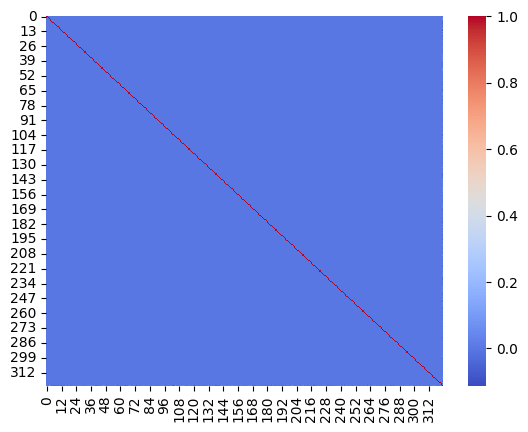

In [99]:
sns.heatmap(train_corr, cmap='coolwarm')

# SVM

## 기본 모델 학습 결과 확인

In [31]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [33]:
# 1. SVM 모델 정의
model = SVC(kernel='rbf', C=10, class_weight='balanced')

# 2. 모델 최종 학습
model.fit(X_tr, y_tr)

# 3. y_val에 대한 예측
y_val_pred = model.predict(X_val)

# 4. 클래스별 평가 지표 계산
accuracy_val = accuracy_score(y_val, y_val_pred)
macro_f1_val = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Set Accuracy: {accuracy_val}')
print(f'Validation Set Macro F1 Score: {macro_f1_val}')
print('Validation Set Classification Report:')
print(classification_report(y_val, y_val_pred))

Validation Set Accuracy: 0.30620467365028203
Validation Set Macro F1 Score: 0.2929604895802021
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        14
           1       0.06      0.05      0.05        21
           2       0.69      0.36      0.47       157
           3       0.09      0.10      0.10        31
           4       0.67      0.58      0.62        45
           5       0.06      0.14      0.08         7
           6       0.48      0.17      0.26        92
           7       0.38      0.27      0.31        45
           8       0.11      0.02      0.03       103
           9       0.37      0.33      0.35        67
          10       0.88      0.22      0.35        32
          11       0.40      0.70      0.50        46
          12       0.27      0.26      0.26        31
          13       0.12      0.08      0.10        37
          14       0.28      0.28      0.28        36
  

## Baysian optimization

In [58]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np

In [59]:
def objective(params):
    # 하이퍼파라미터 추출
    C = params['C']
    gamma = params['gamma']
    class_weight = params['class_weight']

    # 모델 정의
    model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight=class_weight)

    # 모델 학습
    model.fit(X_tr, y_tr)

    # 검증 데이터에 대한 예측
    y_val_pred = model.predict(X_val)

    # 평가 지표 계산
    macro_f1_val = f1_score(y_val, y_val_pred, average='macro')

    # Hyperopt는 목적 함수를 최소화하므로, 음수 값을 반환합니다.
    return {'loss': -macro_f1_val, 'status': STATUS_OK}

# 검색 공간 정의
space = {
    'C': hp.loguniform('C', np.log(1e-3), np.log(1e3)),
    'gamma': hp.loguniform('gamma', np.log(1e-4), np.log(1e1)),
    'class_weight': hp.choice('class_weight', [None, 'balanced'])
}

In [60]:
trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

print("Best hyperparameters:", best)

100%|██████████| 50/50 [12:26<00:00, 14.94s/trial, best loss: -0.3198069436243956]
Best hyperparameters: {'C': 34.115728890672735, 'class_weight': 1, 'gamma': 0.0007256745958313063}


In [63]:
# 5. 최적의 하이퍼파라미터로 모델 재학습
best_C = best['C']
best_gamma = best['gamma']
best_class_weight = 'balanced'

best_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma, class_weight=best_class_weight)
best_model.fit(X_tr, y_tr)
y_val_pred = best_model.predict(X_val)

# 4. 클래스별 평가 지표 계산
accuracy_val = accuracy_score(y_val, y_val_pred)
macro_f1_val = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Set Accuracy: {accuracy_val}')
print(f'Validation Set Macro F1 Score: {macro_f1_val}')
print('Validation Set Classification Report:')
print(classification_report(y_val, y_val_pred))

Validation Set Accuracy: 0.32232070910556004
Validation Set Macro F1 Score: 0.3198069436243956
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.64      0.55        14
           1       0.26      0.24      0.25        21
           2       0.66      0.40      0.50       157
           3       0.16      0.16      0.16        31
           4       0.68      0.67      0.67        45
           5       0.06      0.14      0.09         7
           6       0.45      0.15      0.23        92
           7       0.38      0.29      0.33        45
           8       0.10      0.03      0.05       103
           9       0.38      0.31      0.34        67
          10       0.89      0.25      0.39        32
          11       0.41      0.72      0.52        46
          12       0.27      0.26      0.26        31
          13       0.18      0.11      0.14        37
          14       0.29      0.31      0.30        36
  

# 시각화

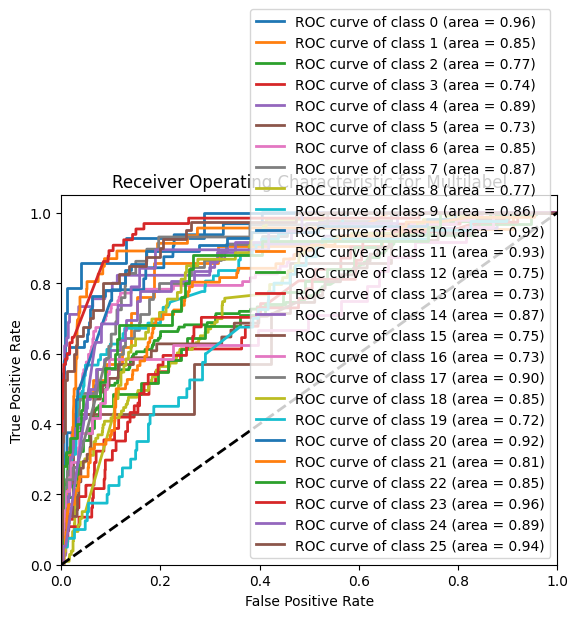

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# 예측 확률 계산 (다중 클래스 처리)
y_score = best_model.decision_function(X_val)
y_val_bin = label_binarize(y_val, classes=np.unique(y_val)) # y_val을 이진화
n_classes = y_val_bin.shape[1]  # Get the number of classes/labels

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multilabel")
plt.legend(loc="lower right")
plt.show()

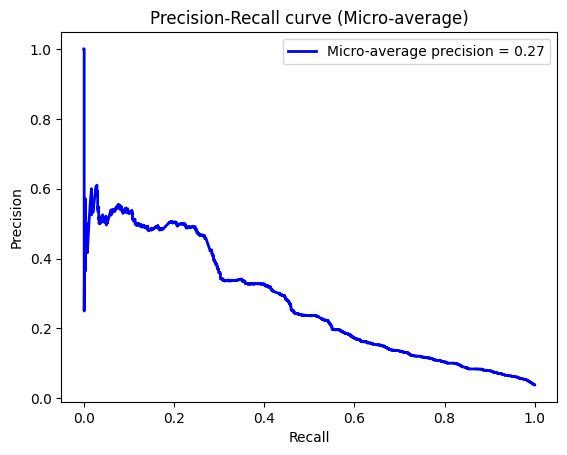

In [65]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 각 클래스에 대한 정밀도-재현율 곡선 계산 및 평균 정밀도 계산
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_val_bin[:, i], y_score[:, i])

# Micro-averaging: 모든 클래스의 기여도를 고려하여 전체 평균 정밀도 계산
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_val_bin.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_val_bin, y_score, average="micro")

# Precision-Recall 곡선 시각화 (Micro-average)
plt.figure()
plt.plot(recall["micro"], precision["micro"], lw=2, color='b',
         label=f'Micro-average precision = {average_precision["micro"]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Micro-average)')
plt.legend(loc="upper right")
plt.show()

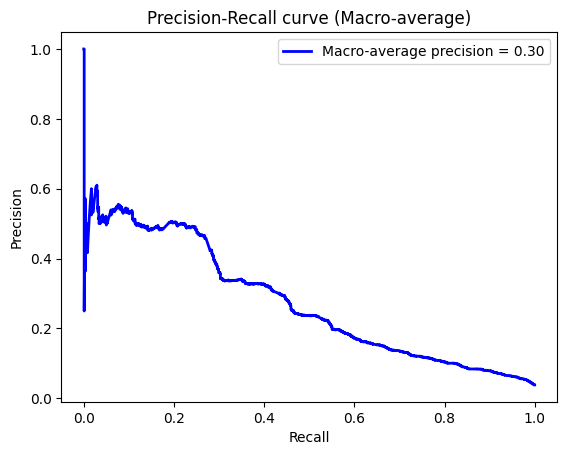

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 각 클래스에 대한 정밀도-재현율 곡선 계산 및 평균 정밀도 계산
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_val_bin[:, i], y_score[:, i])

# Macro-averaging
precision["macro"], recall["macro"], _ = precision_recall_curve(
    y_val_bin.ravel(), y_score.ravel()
)
average_precision["macro"] = average_precision_score(y_val_bin, y_score, average="macro")

# Precision-Recall 곡선 시각화 (Micro-average)
plt.figure()
plt.plot(recall["macro"], precision["macro"], lw=2, color='b',
         label=f'Macro-average precision = {average_precision["macro"]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Macro-average)')
plt.legend(loc="upper right")
plt.show()

# 예측값 계산

In [ ]:
# y_test 사용해 예측값 계산
y_test_pred = best_model.predict(X_test_pca)

In [ ]:
submisson = pd.read_csv("data/sample_submission.csv")
submisson["SUBCLASS"] = y_test_pred.map(idx_to_subclass)
submisson.to_csv("submission.csv", encoding='UTF-8-sig', index=False)